In [35]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('Bitcoin_history_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

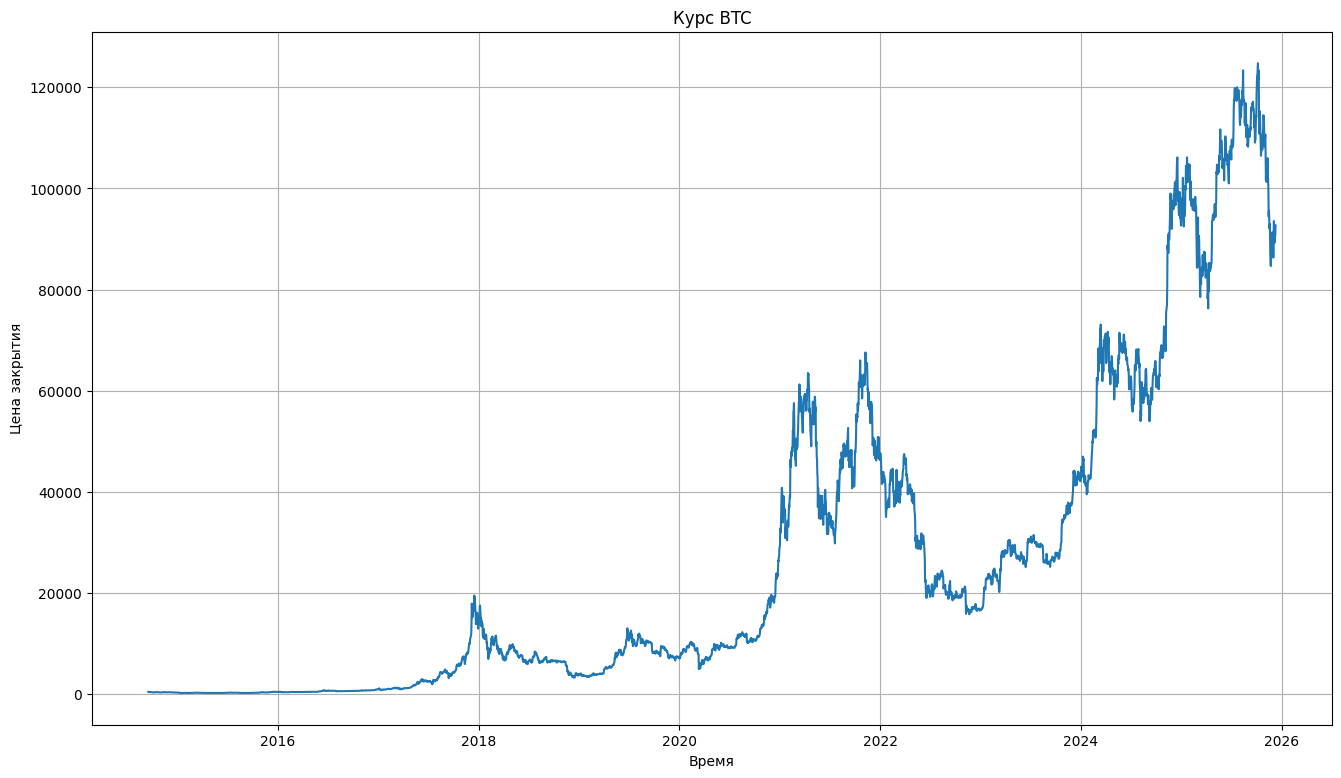

In [63]:
plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Время')
plt.ylabel('Цена закрытия')
plt.title('Курс BTC')
plt.grid(True)

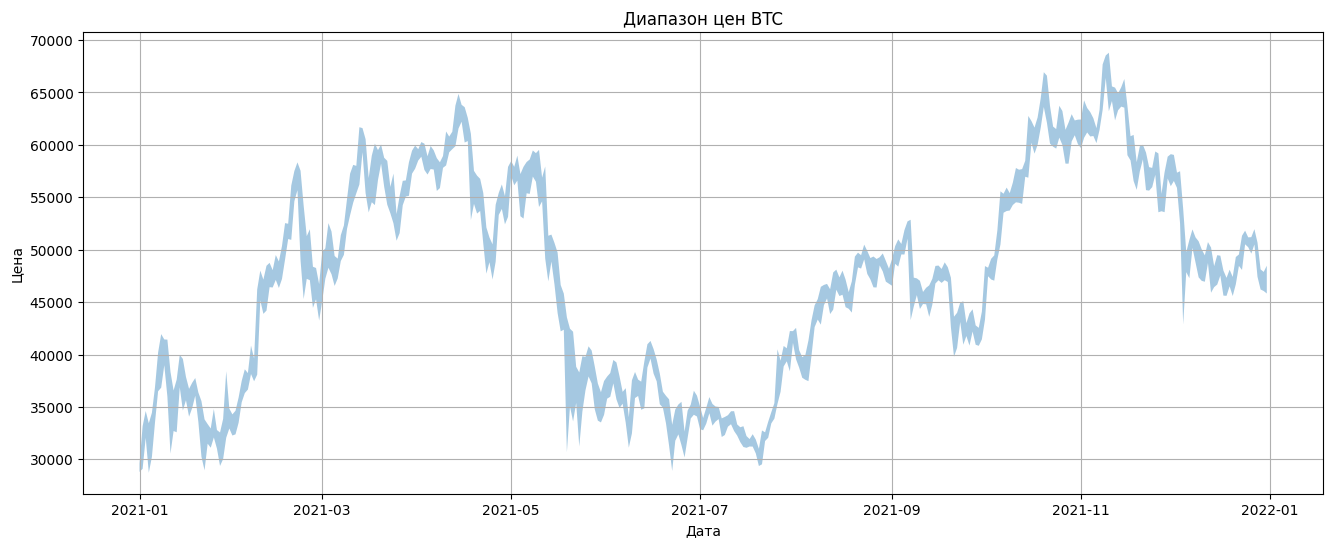

In [64]:
#fill_between
df_zoom = df_part[
    (df_part['Date'] >= '2021-01-01') &
    (df_part['Date'] <= '2021-12-31')
]

plt.figure(figsize=(16,6))
plt.fill_between(
    df_zoom['Date'],
    df_zoom['Low'],
    df_zoom['High'],
    alpha =0.4
)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('Диапазон цен BTC')
plt.grid(True)
#График позволяет визуально оценить волатильность биткоина во времени.Узкая линия - слабая волатильность ,широкая заливка цена скаказала 
#нижняя граница - Low
#верхняя граница - High
#Функция fill_between используется для отображения диапазона значений между минимальной и максимальной ценой за период, что позволяет визуально оценить волатильность рынка.

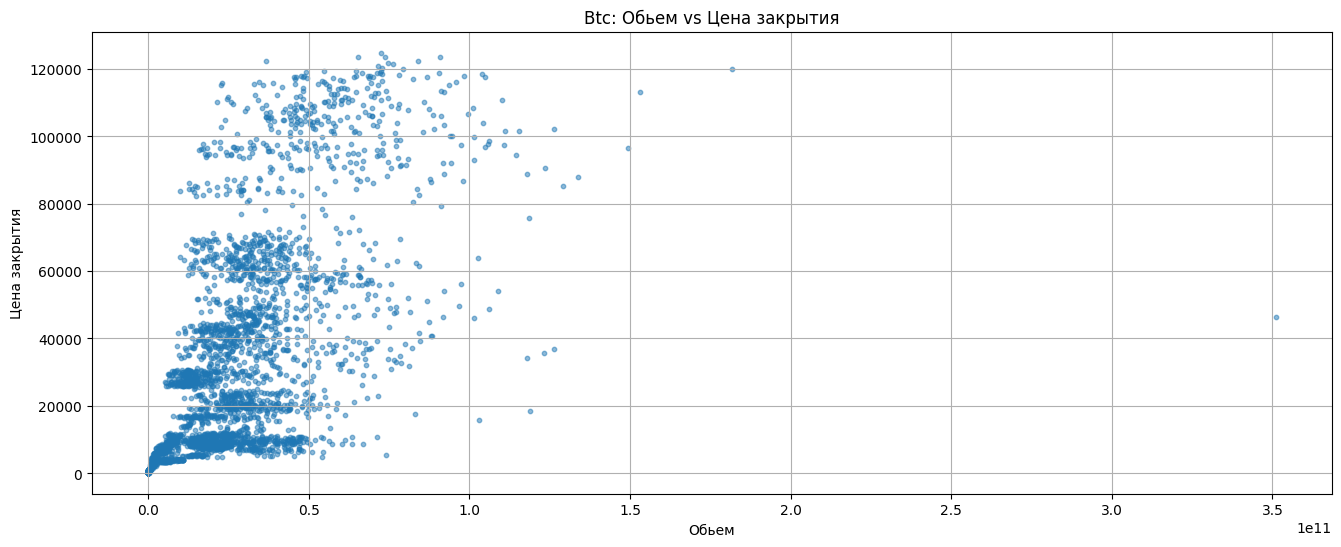

In [65]:
#scatter
plt.figure(figsize=(16,6))
plt.scatter(
    df['Volume'],
    df['Close'],
    s=10,
    alpha=0.5
)
plt.xlabel('Обьем')
plt.ylabel('Цена закрытия')
plt.title('Btc: Обьем vs Цена закрытия')
plt.grid(True)
#Цена биткоина не определяется объёмом напрямую.
#при высоких объёмах торгов увеличивается разброс цен, что свидетельствует о росте волатильности рынка
#Scatter используется для анализа взаимосвязи между двумя признаками, тогда как линейный график применяется для отображения изменения величины во времени.

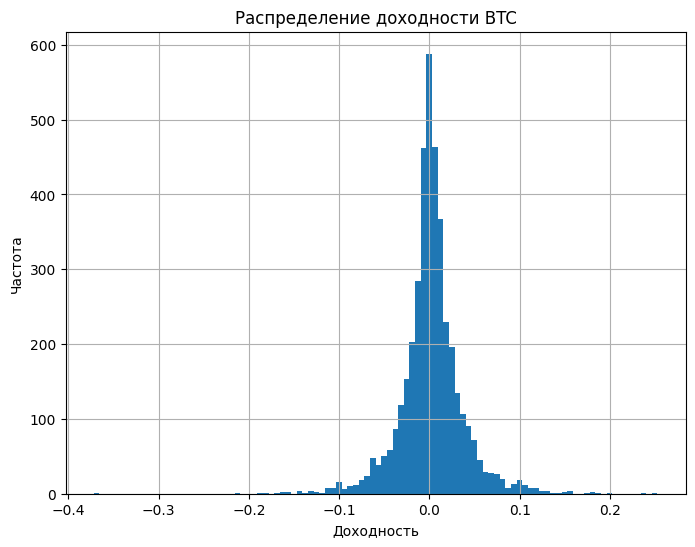

In [66]:
#Histogram (распределение доходности)

#Считаем доходность 
returns = df['Close'].pct_change().dropna()#на сколько процентов изменилась цена по сравнению с предыдущим шагом
plt.figure(figsize=(8, 6))
plt.hist(returns, bins=100)#Bins-на сколько столбиков разбить данные (100)
plt.xlabel('Доходность')
#сколько раз такое изменение встречалось
plt.ylabel('Частота')
plt.title('Распределение доходности BTC')
plt.grid(True)
#По оси X отложены значения доходности, характеризующие относительное изменение цены между соседними периодами. По оси Y отображается частота появления соответствующих значений доходности в выборке.

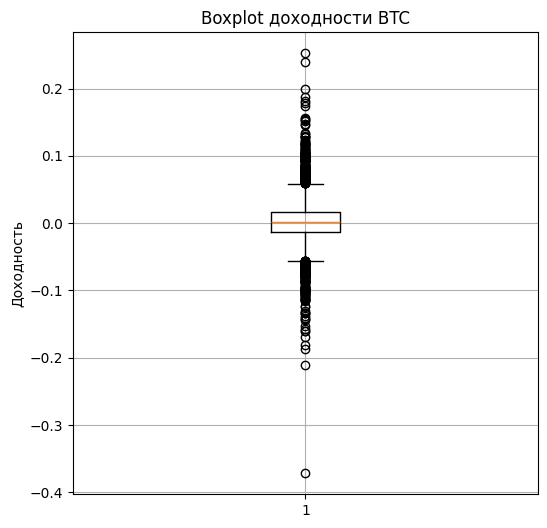

In [67]:
#Boxplot (ящик с усами) для доходности BTC
#Насколько стабильно ведёт себя доходность и как часто бывают экстремумы?
plt.figure(figsize=(6, 6))
plt.boxplot(returns, vert=True)#vert-вертикальный Boxplot
plt.ylabel('Доходность')
plt.title('Boxplot доходности BTC')
plt.grid(True)
#Маленькая коробка + много выбросов = нормальное поведение крипторынка
#Выборы - то что за усами 
#Медиана-середина 
#Медиана определяется как центральное значение отсортированного массива и менее чувствительна к выбросам по сравнению со средним значением.

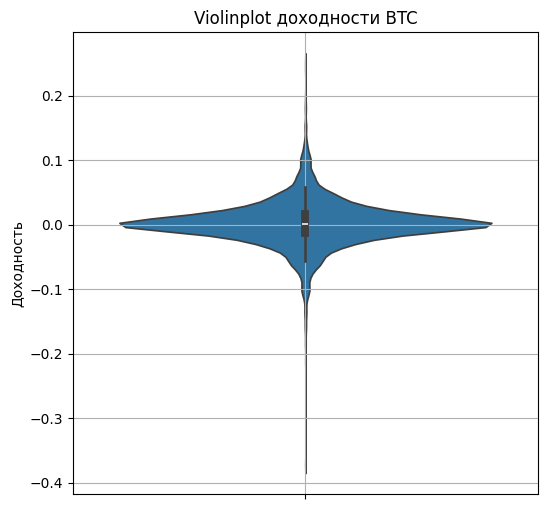

In [68]:
#Violinplot показывает форму распределения данных (плотность)
#Гистограмма + boxplot в одном графике.
#Где данных больше, где меньше и как распределена доходность вокруг медианы.
plt.figure(figsize=(6, 6))
sns.violinplot(y=returns)
plt.ylabel('Доходность')
plt.title('Violinplot доходности BTC')
plt.grid(True)
#Распределение имеет выраженный пик около нуля и длинные хвосты.
#Чем шире скрипка в конкретной точке по Y — тем больше данных с таким значением доходности.

Text(0.5, 1.0, 'Корреляционная матрица BTC')

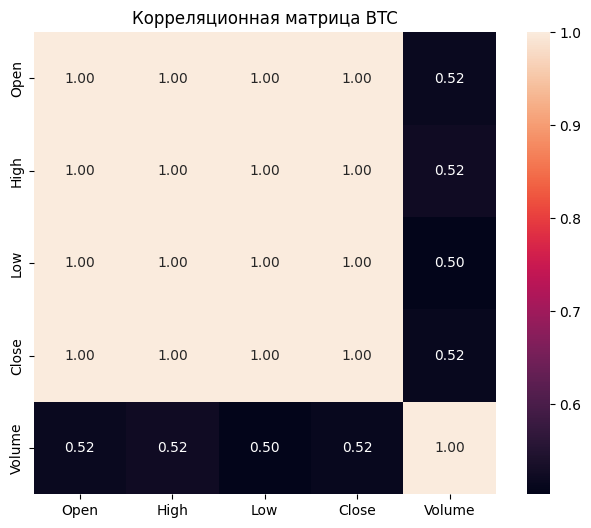

In [69]:
#Heatmap показывает, насколько признаки связаны между собой.
cols = ['Open', 'High', 'Low', 'Close', 'Volume']
corr = df_part[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    square=True
)
plt.title('Корреляционная матрица BTC')
#Open, High, Low и Close имеют почти полную корреляцию между собой, что объясняется тем, что они описывают один и тот же рынок.

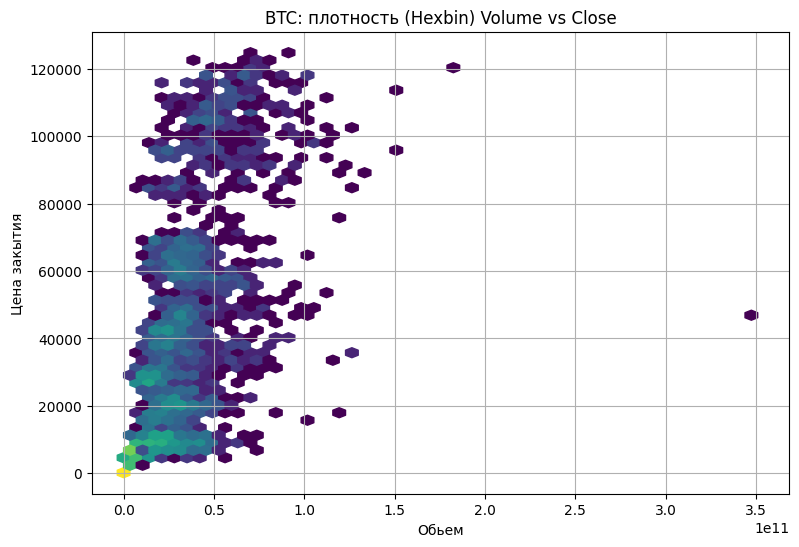

In [70]:
#Hexbin (плотность точек)
#В каких диапазонах объёма и цены данных больше всего?
plt.figure(figsize=(9, 6))
plt.hexbin(
    df['Volume'],
    df['Close'],
    gridsize=50,
    bins = 'log'
)#bins - логорфмируем количество точек (плотность) в каждой hex-ячейке. 
#count = сколько точек туда попало
#log(count)
plt.xlabel('Обьем')
plt.ylabel('Цена закытия')
plt.title('BTC: плотность (Hexbin) Volume vs Close')
plt.grid(True)
#График показывает, где наблюдений больше всего, в отличие от scatter, где точки накладываются.
#Чем темнее цвет — тем больше наблюдений (выше плотность).

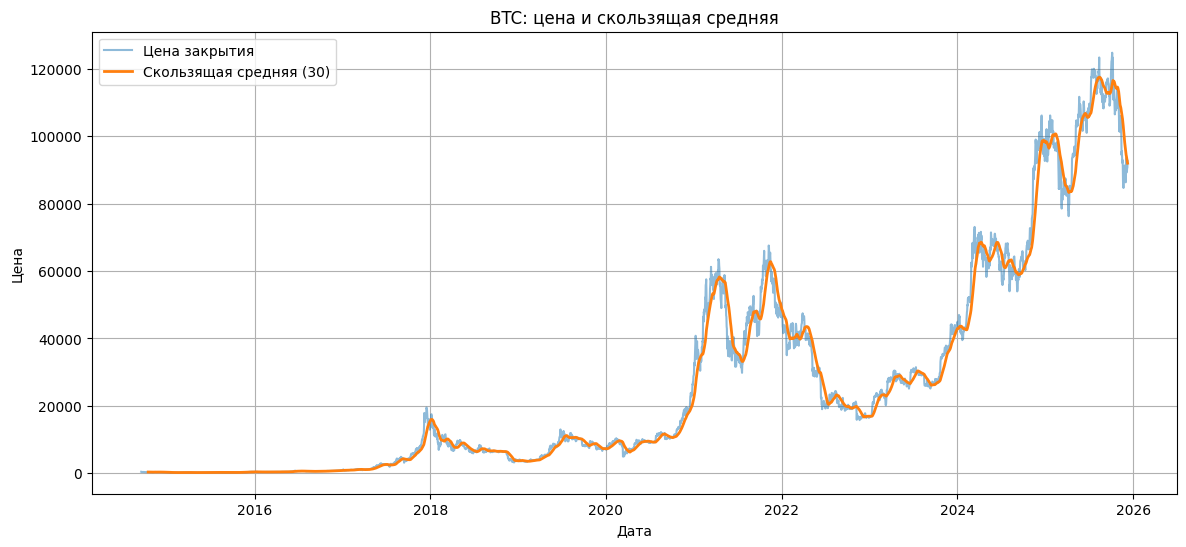

In [71]:
#Rolling Mean
#Куда в целом движется цена, если не обращать внимание на мелкие колебания?
df['RollingMean'] = df['Close'].rolling(window=30).mean()
plt.figure(figsize=(14, 6))
plt.plot(df['Date'],df['Close'],alpha=0.5,label='Цена закрытия')
plt.plot(df['Date'],df['RollingMean'],linewidth=2, label=f'Скользящая средняя ({30})')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('BTC: цена и скользящая средняя')
plt.legend()
plt.grid(True)
#В долгосрочной перспективе наблюдается восходящий тренд цены BTC.
#Строится с 30 дня
#Скользящая средняя убирает шум и показывает тренд.
#Скользящая средняя используется для сглаживания временного ряда и уменьшения влияния случайных колебаний, что позволяет выделить общий тренд изменения цены.

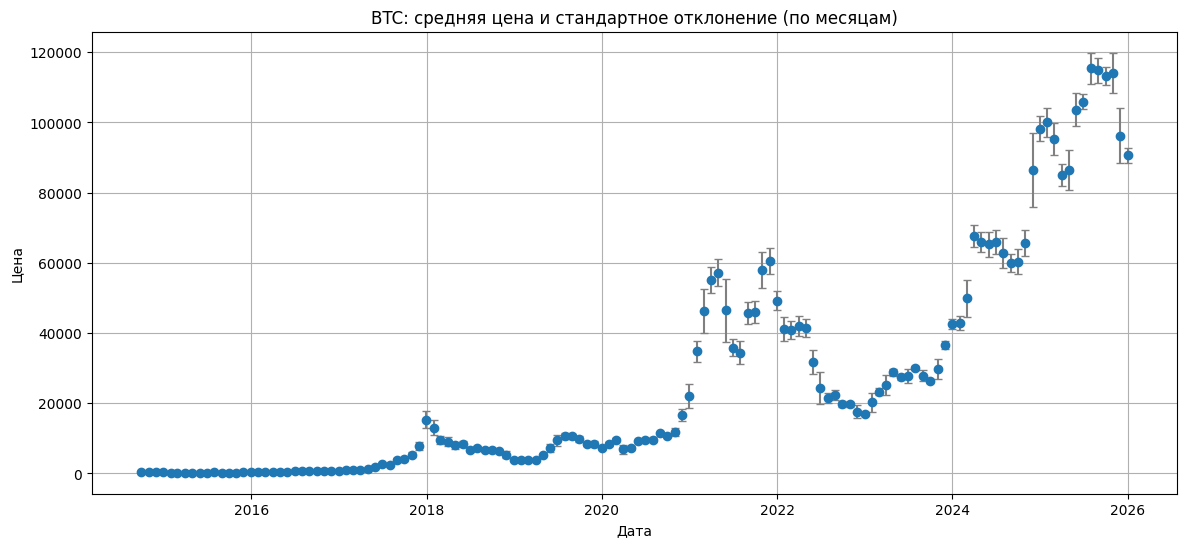

In [72]:
#errorbar
#Насколько сильно значения колеблются вокруг среднего?
df_month = (
    df
    .set_index('Date')
    .resample('ME')
    .agg({
        'Close':['mean','std']
    })
)#set_indexx - Делаем Date -инде5ксом ,что бы resample работал (он работает тока по индексам времени)
#resample (данные группируются по месяцам(Me))
#agg (Применяет несколько статистических функций к данным).Берем колонку close и считаем mean,std
df_month.columns=['Mean', 'Std']
df_month = df_month.dropna()#удаляет строки, где есть NaN
plt.figure(figsize=(14, 6))
plt.errorbar(
    df_month.index#Ось X,
    df_month['Mean']#Ось Y,
    yerr=df_month['Std']#Величина ошибок(Усы),
    fmt='o'#Формат точек,
    ecolor='gray'#Цвет услов,серый,
    capsize=3#Размер шляпок на конце усов
)

plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('BTC: средняя цена и стандартное отклонение (по месяцам)')
plt.grid(True)
#Чем выше цена BTC, тем выше волатильность.
#показывает насколько цена колебалась внутри месяца
#длинные усы высокая волатильность
#короткие усы более стабильный период